In [1]:
import numpy as np
import networkx as nx
import re
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Helper function to read input from file if too large to paste inline
def read_input(fname):
    with open(fname, 'r') as f:
        data_str = f.read()
    return data_str

# Day 1: Chronal Calibration 
"We've detected some temporal anomalies," one of Santa's Elves at the Temporal Anomaly Research and Detection Instrument Station tells you. She sounded pretty worried when she called you down here. "At 500-year intervals into the past, someone has been changing Santa's history!"

"The good news is that the changes won't propagate to our time stream for another 25 days, and we have a device" - she attaches something to your wrist - "that will let you fix the changes with no such propagation delay. It's configured to send you 500 years further into the past every few days; that was the best we could do on such short notice."

"The bad news is that we are detecting roughly fifty anomalies throughout time; the device will indicate fixed anomalies with stars. The other bad news is that we only have one device and you're the best person for the job! Good lu--" She taps a button on the device and you suddenly feel like you're falling. To save Christmas, you need to get all fifty stars by December 25th.

Collect stars by solving puzzles. Two puzzles will be made available on each day in the advent calendar; the second puzzle is unlocked when you complete the first. Each puzzle grants one star. Good luck!

After feeling like you've been falling for a few minutes, you look at the device's tiny screen. "Error: Device must be calibrated before first use. Frequency drift detected. Cannot maintain destination lock." Below the message, the device shows a sequence of changes in frequency (your puzzle input). A value like +6 means the current frequency increases by 6; a value like -3 means the current frequency decreases by 3.

For example, if the device displays frequency changes of +1, -2, +3, +1, then starting from a frequency of zero, the following changes would occur:

    Current frequency  0, change of +1; resulting frequency  1.
    Current frequency  1, change of -2; resulting frequency -1.
    Current frequency -1, change of +3; resulting frequency  2.
    Current frequency  2, change of +1; resulting frequency  3.
    In this example, the resulting frequency is 3.

Here are other example situations:

    +1, +1, +1 results in  3
    +1, +1, -2 results in  0
    -1, -2, -3 results in -6

Starting with a frequency of zero, what is the resulting frequency after all of the changes in frequency have been applied?

Your puzzle answer was 402.

In [5]:
day1_input = read_input('day_01.txt')

In [12]:
day1_freq_changes = map(int, day1_input.split())

In [13]:
# Part 1 - total frequency change
sum(day1_freq_changes)

402

## Day 1 Part Two 
You notice that the device repeats the same frequency change list over and over. To calibrate the device, you need to find the first frequency it reaches twice.

For example, using the same list of changes above, the device would loop as follows:

    Current frequency  0, change of +1; resulting frequency  1.
    Current frequency  1, change of -2; resulting frequency -1.
    Current frequency -1, change of +3; resulting frequency  2.
    Current frequency  2, change of +1; resulting frequency  3.
    (At this point, the device continues from the start of the list.)
    Current frequency  3, change of +1; resulting frequency  4.
    Current frequency  4, change of -2; resulting frequency  2, which has already been seen.
In this example, the first frequency reached twice is 2. Note that your device might need to repeat its list of frequency changes many times before a duplicate frequency is found, and that duplicates might be found while in the middle of processing the list.

Here are other examples:

    +1, -1 first reaches 0 twice.
    +3, +3, +4, -2, -4 first reaches 10 twice.
    -6, +3, +8, +5, -6 first reaches 5 twice.
    +7, +7, -2, -7, -4 first reaches 14 twice.
What is the first frequency your device reaches twice?

Your puzzle answer was 481.

In [33]:
def first_freq_seen_twice(changes):
    # Keep looping through input and tracking what how many times we've seen current frequency
    i = 0
    loop_count = 0 
    N = len(changes)
    seen_twice = None
    current_freq = 0
    freq_seen = defaultdict(int)
    freq_seen[0] = 1
    while seen_twice is None:
        if i % N == 0:
            loop_count += 1
        this_change = changes[i % N]
        current_freq += this_change
        freq_seen[current_freq] += 1
        if freq_seen[current_freq] > 1:
            seen_twice = current_freq
        i += 1
    return seen_twice, loop_count

In [36]:
# first frequency seen twice and number of loop iterations required
first_freq_seen_twice(day1_freq_changes)

(481, 142)

Feels like there should be a smarter way to do this e.g. use cumsum input list somehow.
We see from the naive solution that it takes 142 loops to see a frequency again.

The plot below shows that the frequency changes are usually small with a few large jumps, and from part 1 we know that each loop has a net offset of +402. So we're interested in number of loops required before second or third regions in plot below start to ovelap either with first region or each other.

I don't have a solution for this yet, one to ponder.

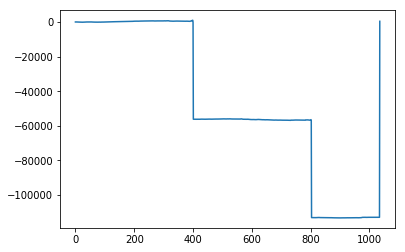

In [35]:
_ = plt.plot(np.cumsum(day1_freq_changes))
_ = plt.show()

# Day 2: Inventory Management System 
You stop falling through time, catch your breath, and check the screen on the device. "Destination reached. Current Year: 1518. Current Location: North Pole Utility Closet 83N10." You made it! Now, to find those anomalies.

Outside the utility closet, you hear footsteps and a voice. "...I'm not sure either. But now that so many people have chimneys, maybe he could sneak in that way?" Another voice responds, "Actually, we've been working on a new kind of suit that would let him fit through tight spaces like that. But, I heard that a few days ago, they lost the prototype fabric, the design plans, everything! Nobody on the team can even seem to remember important details of the project!"

"Wouldn't they have had enough fabric to fill several boxes in the warehouse? They'd be stored together, so the box IDs should be similar. Too bad it would take forever to search the warehouse for two similar box IDs..." They walk too far away to hear any more.

Late at night, you sneak to the warehouse - who knows what kinds of paradoxes you could cause if you were discovered - and use your fancy wrist device to quickly scan every box and produce a list of the likely candidates (your puzzle input).

To make sure you didn't miss any, you scan the likely candidate boxes again, counting the number that have an ID containing exactly two of any letter and then separately counting those with exactly three of any letter. You can multiply those two counts together to get a rudimentary checksum and compare it to what your device predicts.

For example, if you see the following box IDs:

    abcdef contains no letters that appear exactly two or three times.
    bababc contains two a and three b, so it counts for both.
    abbcde contains two b, but no letter appears exactly three times.
    abcccd contains three c, but no letter appears exactly two times.
    aabcdd contains two a and two d, but it only counts once.
    abcdee contains two e.
    ababab contains three a and three b, but it only counts once.
Of these box IDs, four of them contain a letter which appears exactly twice, and three of them contain a letter which appears exactly three times. Multiplying these together produces a checksum of 4 * 3 = 12.

What is the checksum for your list of box IDs?

Your puzzle answer was 6225.

In [3]:
box_ids = read_input('day_02.txt').split('\n')

In [4]:
len(box_ids)

250

In [8]:
def count_letters(box_id):
    res = defaultdict(int)
    for letter in box_id:
        res[letter] += 1
    count_2 = 1 if 2 in res.values() else 0
    count_3 = 1 if 3 in res.values() else 0
    return count_2, count_3

In [18]:
# checksum = 
np.prod(np.array([sum(lst) for lst in zip(*[count_letters(box_id) for box_id in box_ids])]))

6225

# Part Two
Confident that your list of box IDs is complete, you're ready to find the boxes full of prototype fabric.

The boxes will have IDs which differ by exactly one character at the same position in both strings. For example, given the following box IDs:

    abcde
    fghij
    klmno
    pqrst
    fguij
    axcye
    wvxyz
The IDs abcde and axcye are close, but they differ by two characters (the second and fourth). However, the IDs fghij and fguij differ by exactly one character, the third (h and u). Those must be the correct boxes.

What letters are common between the two correct box IDs? (In the example above, this is found by removing the differing character from either ID, producing fgij.)

Your puzzle answer was revtaubfniyhsgxdoajwkqilp.

In [22]:
box_ids_ints = np.array([[ord(c) for c in box_id] for box_id in box_ids])

In [39]:
def find_diff_1_boxes(box_ids):
    X = np.array([[ord(c) for c in box_id] for box_id in box_ids])
    res = []
    n_boxes = len(box_ids)
    for i in range(n_boxes):
        for j in range(i, n_boxes):
            char_diff = np.not_equal(X[i, :] - X[j, :], 0)
            n_char_diff = char_diff.sum()
            if n_char_diff == 1:
                res.append((i, j, int(np.nonzero(char_diff)[0])))
    return res

In [42]:
[(box_ids[i], box_ids[j], box_ids[i][:ind] + box_ids[i][ind+1:]) for (i, j, ind) in find_diff_1_boxes(box_ids)]

[('revtaubfniyhusgxdoajwkqilp',
  'revtaubfniyhpsgxdoajwkqilp',
  'revtaubfniyhsgxdoajwkqilp')]